In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import seaborn as sns

import os
import sys

sys.path.append("../")  # append for conformal function

from plots.utils_plots import set_aistats2023_style
from tueplots import figsizes, axes, fontsizes, fonts, markers


In [ ]:
cmap = sns.color_palette("deep")
ova_plot_args = {"alpha": 0.5,
                 "marker": "o",
                 "color": cmap[0],
                 "linestyle": "dotted"}

softmax_plot_args = {"alpha": 0.5,
                     "marker": "s",
                     "color": cmap[1],
                     "linestyle": "dashed"}
exp_list = [1, 2, 4, 6, 8, 12, 16]

# System accuracies

In [9]:
dataset = "HAM10000"
softmax_ham_mean = np.array([85.9375, 82.03125, 88.02083333, 88.8020833, 86.45833333, 88.28125, 88.80208333])
softmax_ham_std = np.array([6.28246775, 8.14400821, 6.02908172, 2.65573933, 4.34201354, 2.78048913, 2.65573933])
ova_ham_mean = np.array([84.375 , 85.9375, 89.58333333, 92.44791667, 89.58333333, 89.84375, 91.66666667])
ova_ham_std = np.array([1.68769289, 5.45011707, 6.02908172, 2.57799347, 7.55657194, 3.55160982, 3.14662656])

dataset = "Galaxy"
softmax_galaxy_mean = np.array([85.62, 74.63, 71.65, 77.82, 81.86, 77.9, 79.31])
softmax_galaxy_std = np.array([1.86, 3.57, 1.26, 4.64, 2.16, 1.43, 3.67])
ova_galaxy_mean = np.array([87.46, 81.60, 83.89, 78.06, 83.70, 81.39, 81.43])
ova_galaxy_std = np.array([0.91, 1.18, 1.95, 1.85, 2.89, 1.24, 0.24])

dataset = "Hate Speech"
softmax_speech_mean = np.array([91.04, 89.16, 90.87, 88.54, 89.91, 85.10, 86.92])
softmax_speech_std = np.array([0.73, 0.02, 1.09, 2.02, 1.91, 2.73, 2.53])
ova_speech_mean = np.array([93.63, 92.83, 90.09, 89.71, 88.15, 91.01, 87.34])
ova_speech_std = np.array([0.97, 0.14, 0.92, 1.27, 3.05, 4.76, 1.51])


# Plot format

In [ ]:
sns.set_palette(sns.color_palette("deep"))
plt.rcParams.update(figsizes.aistats2023_half(tight_layout=True,
                                              height_to_width_ratio=1))  # make square fig.

plt.rcParams.update(fonts.aistats2022_tex(family="serif"))
plt.rcParams.update(axes.grid(grid_alpha=0.5))  # custom grid. alpha=0-1, for transparency
# Markers
plt.rcParams.update({"errorbar.capsize": 3})  # error bars capsize
plt.rcParams.update(markers.with_edge())  # set markers with black edge

# Delete line in legend
plt.rcParams['legend.handlelength'] = 0.1
plt.rcParams['legend.numpoints'] = 1

HAM10000 | OvA 1 expert: Mean 83.46 \ Std 0.56
HAM10000 | Softmax 1 expert: Mean 84.63 \ Std 3.88
HAM10000 | OvA 2 expert: Mean 87.26 \ Std 2.93
HAM10000 | Softmax 2 expert: Mean 78.88 \ Std 1.81
HAM10000 | OvA 4 expert: Mean 58.2 \ Std 16.48
HAM10000 | Softmax 4 expert: Mean 53.3 \ Std 10.3
HAM10000 | OvA 6 expert: Mean 69.89 \ Std 12.32
HAM10000 | Softmax 6 expert: Mean 62.1 \ Std 9.11
HAM10000 | OvA 8 expert: Mean 52.18 \ Std 5.82
HAM10000 | Softmax 8 expert: Mean 60.54 \ Std 8.43
HAM10000 | OvA 12 expert: Mean 50.59 \ Std 12.63
HAM10000 | Softmax 12 expert: Mean 69.42 \ Std 1.38
HAM10000 | OvA 16 expert: Mean 67.29 \ Std 4.49
HAM10000 | Softmax 16 expert: Mean 63.93 \ Std 1.27


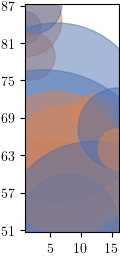

In [13]:
# set_aistats2023_style()
dataset = "HAM10000"
fig, ax = plt.subplots(1,1) # note we must use plt.subplots, not plt.subplot

scale_axis = 1
x_axis = [exp*scale_axis for exp in exp_list]

# Scalings
offset_marker = 2
scale_y = scale_axis
scale_mark = 0

for i, e in enumerate(exp_list):    
    # OvA ===
    radius_ova = offset_marker + ova_ham_std[i] * scale_y
    print("{} | OvA {} expert: Mean {} \ Std {}".format(dataset, e, ova_ham_mean[i], ova_ham_std[i]))
    ova_mean_scale = ova_ham_mean[i] * scale_axis
    plt.gca().add_patch(plt.Circle((x_axis[i], ova_mean_scale), radius_ova + scale_mark, fill=True, alpha=0.5, color=cmap[0]))
    
    # Softmax ===
    radius_softmax = offset_marker + softmax_ham_std[i] * scale_y 
    print("{} | Softmax {} expert: Mean {} \ Std {}".format(dataset, e, softmax_ham_mean[i], softmax_ham_std[i]))
    softmax_mean_scale = softmax_ham_mean[i] * scale_axis
    plt.gca().add_patch(plt.Circle((x_axis[i], softmax_mean_scale), radius_softmax + scale_mark, fill=True, alpha=0.5, color=cmap[1]))

# plt.plot(x_axis, ova_ham_mean * scale_y, color="black", linestyle="dotted", alpha=0.5, linewidth=1)
# plt.plot(x_axis, softmax_ham_mean * scale_y, color="black", linestyle="dashed", alpha=0.5,  linewidth=1)


# x axis
ax.set_xlim(min(x_axis), max(x_axis))
# ax.set_xticks(x_axis, exp_list)

# # y axis
min_y = min(min(ova_ham_mean), min(softmax_ham_mean))
max_y = max(max(ova_ham_mean), max(softmax_ham_mean))
yticks = np.round(np.linspace(min_y, max_y, len(exp_list)))
yticks_labels = [int(y_i) for y_i in yticks]
ax.set_ylim(min_y * scale_y, max_y * scale_y)
ax.set_yticks(yticks*scale_y, yticks_labels)

# # Legend
# ova_leg = mlines.Line2D([], [], label="OvA", alpha=0.5, marker="o", color=cmap[0], linestyle="")
# softmax_leg = mlines.Line2D([], [], label="Softmax", alpha=0.5, marker="o", color=cmap[1], linestyle="")
# plt.legend(handles=[ova_leg, softmax_leg], loc="best")

# ax.set_ylabel(r"System Accuracy $(\%)$")
# ax.set_xlabel(r"Number of experts")
# plt.title("{}".format(dataset))
# ax.grid()

# # IMPORTANT! This allows to get the circles. Otherwise, ellipses!
plt.gca().set_aspect(1)

# plt.savefig("ham10000.pdf")
# fig = plt.gcf()
# size = fig.get_size_inches()*fig.dpi # size in pixels
# print(size)

HAM10000 | OvA 1 expert: Mean 83.46 \ Std 0.56
HAM10000 | Softmax 1 expert: Mean 84.63 \ Std 3.88
HAM10000 | OvA 2 expert: Mean 87.26 \ Std 2.93
HAM10000 | Softmax 2 expert: Mean 78.88 \ Std 1.81
HAM10000 | OvA 4 expert: Mean 58.2 \ Std 16.48
HAM10000 | Softmax 4 expert: Mean 53.3 \ Std 10.3
HAM10000 | OvA 6 expert: Mean 69.89 \ Std 12.32
HAM10000 | Softmax 6 expert: Mean 62.1 \ Std 9.11
HAM10000 | OvA 8 expert: Mean 52.18 \ Std 5.82
HAM10000 | Softmax 8 expert: Mean 60.54 \ Std 8.43
HAM10000 | OvA 12 expert: Mean 50.59 \ Std 12.63
HAM10000 | Softmax 12 expert: Mean 69.42 \ Std 1.38
HAM10000 | OvA 16 expert: Mean 67.29 \ Std 4.49
HAM10000 | Softmax 16 expert: Mean 63.93 \ Std 1.27


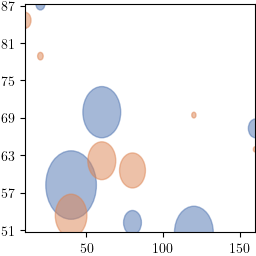

In [14]:
# set_aistats2023_style()
dataset = "HAM10000"
fig, ax = plt.subplots(1,1) # note we must use plt.subplots, not plt.subplot
x_axis = [exp*10 for exp in exp_list]

# Scalings
scale_mark = 0
scale_y = 3
for i, e in enumerate(exp_list):    
    # OvA ===
    radius_ova = ova_ham_std[i]
    print("{} | OvA {} expert: Mean {} \ Std {}".format(dataset, e, ova_ham_mean[i], ova_ham_std[i]))
    ova_mean_scale = ova_ham_mean[i] * scale_y
    plt.gca().add_patch(plt.Circle((x_axis[i], ova_mean_scale), radius_ova + scale_mark, fill=True, alpha=0.5, color=cmap[0]))
    
    # Softmax ===
    radius_softmax = softmax_ham_std[i]
    print("{} | Softmax {} expert: Mean {} \ Std {}".format(dataset, e, softmax_ham_mean[i], softmax_ham_std[i]))
    softmax_mean_scale = softmax_ham_mean[i] * scale_y
    plt.gca().add_patch(plt.Circle((x_axis[i], softmax_mean_scale), radius_softmax + scale_mark, fill=True, alpha=0.5, color=cmap[1]))

# plt.plot(x_axis, ova_ham_mean * scale_y, color="black", linestyle="dotted", alpha=0.5, linewidth=1)
# plt.plot(x_axis, softmax_ham_mean * scale_y, color="black", linestyle="dashed", alpha=0.5,  linewidth=1)


# x axis
ax.set_xlim(min(x_axis), max(x_axis))
# ax.set_xticks(x_axis, exp_list)

# # y axis
min_y = min(min(ova_ham_mean), min(softmax_ham_mean))
max_y = max(max(ova_ham_mean), max(softmax_ham_mean))
yticks = np.round(np.linspace(min_y, max_y, len(exp_list)))
yticks_labels = [int(y_i) for y_i in yticks]
ax.set_ylim(min_y * scale_y, max_y * scale_y)
ax.set_yticks(yticks*scale_y, yticks_labels)

# # Legend
# ova_leg = mlines.Line2D([], [], label="OvA", alpha=0.5, marker="o", color=cmap[0], linestyle="")
# softmax_leg = mlines.Line2D([], [], label="Softmax", alpha=0.5, marker="o", color=cmap[1], linestyle="")
# plt.legend(handles=[ova_leg, softmax_leg], loc="best")

# ax.set_ylabel(r"System Accuracy $(\%)$")
# ax.set_xlabel(r"Number of experts")
# plt.title("{}".format(dataset))
# ax.grid()

# # IMPORTANT! This allows to get the circles. Otherwise, ellipses!
# plt.gca().set_aspect(1)

# plt.savefig("ham10000.pdf")
# fig = plt.gcf()
# size = fig.get_size_inches()*fig.dpi # size in pixels
# print(size)

# HAM10000

HAM10000 | OvA 1 expert: Mean 83.46 \ Std 0.56
HAM10000 | Softmax 1 expert: Mean 84.63 \ Std 3.88
HAM10000 | OvA 2 expert: Mean 87.26 \ Std 2.93
HAM10000 | Softmax 2 expert: Mean 78.88 \ Std 1.81
HAM10000 | OvA 4 expert: Mean 58.2 \ Std 16.48
HAM10000 | Softmax 4 expert: Mean 53.3 \ Std 10.3
HAM10000 | OvA 6 expert: Mean 69.89 \ Std 12.32
HAM10000 | Softmax 6 expert: Mean 62.1 \ Std 9.11
HAM10000 | OvA 8 expert: Mean 52.18 \ Std 5.82
HAM10000 | Softmax 8 expert: Mean 60.54 \ Std 8.43
HAM10000 | OvA 12 expert: Mean 50.59 \ Std 12.63
HAM10000 | Softmax 12 expert: Mean 69.42 \ Std 1.38
HAM10000 | OvA 16 expert: Mean 67.29 \ Std 4.49
HAM10000 | Softmax 16 expert: Mean 63.93 \ Std 1.27
(5.0, 250.0)
(141.77, 271.78000000000003)


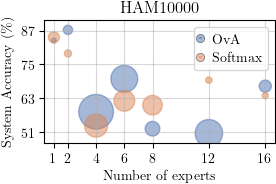

In [15]:
# set_aistats2023_style()
dataset = "HAM10000"
fig, ax = plt.subplots(1,1, sharex=True, sharey=True) # note we must use plt.subplots, not plt.subplot
x_axis = [exp*15 for exp in exp_list]

scale_mark = 2
scale_y = 3
for i, e in enumerate(exp_list):    
    radius_ova = ova_ham_std[i]
    print("{} | OvA {} expert: Mean {} \ Std {}".format(dataset, e, ova_ham_mean[i], ova_ham_std[i]))
    plt.gca().add_patch(plt.Circle((x_axis[i], ova_ham_mean[i] * scale_y), radius_ova + scale_mark, fill=True, alpha=0.5, color=cmap[0]))
    radius_softmax = softmax_ham_std[i]
    print("{} | Softmax {} expert: Mean {} \ Std {}".format(dataset, e, softmax_ham_mean[i], softmax_ham_std[i]))
    plt.gca().add_patch(plt.Circle((x_axis[i], softmax_ham_mean[i] * scale_y), radius_softmax + scale_mark, fill=True, alpha=0.5, color=cmap[1]))

# plt.plot(x_axis, ova_galaxy_mean, color="black", linestyle="dotted", alpha=0.5)
# plt.plot(x_axis, softmax_galaxy_mean, color="black", linestyle="dashed", alpha=0.5)

# x axis
ax.set_xlim(min(x_axis)-10, max(x_axis)+10)
ax.set_xticks(x_axis, exp_list)

# y axis
min_y = min(min(ova_ham_mean), min(softmax_ham_mean))
max_y = max(max(ova_ham_mean), max(softmax_ham_mean))
yticks = np.round(np.linspace(min_y, max_y, len(exp_list)))
yticks_labels = [int(y_i) for y_i in yticks]
ax.set_ylim(min_y * scale_y-10, max_y * scale_y+10)
ax.set_yticks(yticks[::2]*scale_y, yticks_labels[::2])

# Legend
ova_leg = mlines.Line2D([], [], label="OvA", alpha=0.5, marker="o", color=cmap[0])
softmax_leg = mlines.Line2D([], [], label="Softmax", alpha=0.5, marker="o", color=cmap[1])
plt.legend(handles=[ova_leg, softmax_leg], loc="best")

ax.set_ylabel(r"System Accuracy $(\%)$")
ax.set_xlabel(r"Number of experts")
plt.title("{}".format(dataset))
ax.grid()

# IMPORTANT! This allows to get the circles. Otherwise, ellipses!
plt.gca().set_aspect(1, adjustable='box')

# plt.savefig("ham10000_systemaccuracy.pdf")
print(ax.get_xlim())
print(ax.get_ylim())

HAM10000 | OvA 1 expert: Mean 83.46 \ Std 0.56
HAM10000 | Softmax 1 expert: Mean 84.63 \ Std 3.88
HAM10000 | OvA 2 expert: Mean 87.26 \ Std 2.93
HAM10000 | Softmax 2 expert: Mean 78.88 \ Std 1.81
HAM10000 | OvA 4 expert: Mean 58.2 \ Std 16.48
HAM10000 | Softmax 4 expert: Mean 53.3 \ Std 10.3
HAM10000 | OvA 6 expert: Mean 69.89 \ Std 12.32
HAM10000 | Softmax 6 expert: Mean 62.1 \ Std 9.11
HAM10000 | OvA 8 expert: Mean 52.18 \ Std 5.82
HAM10000 | Softmax 8 expert: Mean 60.54 \ Std 8.43
HAM10000 | OvA 12 expert: Mean 50.59 \ Std 12.63
HAM10000 | Softmax 12 expert: Mean 69.42 \ Std 1.38
HAM10000 | OvA 16 expert: Mean 67.29 \ Std 4.49
HAM10000 | Softmax 16 expert: Mean 63.93 \ Std 1.27


/Users/dbarrejon/miniconda3/envs/l2d-conformal/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


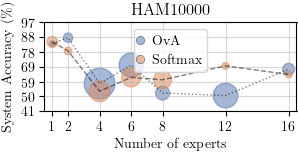

In [20]:
# set_aistats2023_style()
dataset = "HAM10000"
fig, ax = plt.subplots(1,1) # note we must use plt.subplots, not plt.subplot
x_axis = [exp*20 for exp in exp_list]

# Scalings
scale_mark = 3
scale_y = 2
for i, e in enumerate(exp_list):    
    # OvA ===
    radius_ova = ova_ham_std[i]
    print("{} | OvA {} expert: Mean {} \ Std {}".format(dataset, e, ova_ham_mean[i], ova_ham_std[i]))
    ova_mean_scale = ova_ham_mean[i] * scale_y
    plt.gca().add_patch(plt.Circle((x_axis[i], ova_mean_scale), radius_ova + scale_mark, fill=True, alpha=0.5, color=cmap[0]))
    
    # Softmax ===
    radius_softmax = softmax_ham_std[i]
    print("{} | Softmax {} expert: Mean {} \ Std {}".format(dataset, e, softmax_ham_mean[i], softmax_ham_std[i]))
    softmax_mean_scale = softmax_ham_mean[i] * scale_y
    plt.gca().add_patch(plt.Circle((x_axis[i], softmax_mean_scale), radius_softmax + scale_mark, fill=True, alpha=0.5, color=cmap[1]))

plt.plot(x_axis, ova_ham_mean * scale_y, color="black", linestyle="dotted", alpha=0.5, linewidth=1)
plt.plot(x_axis, softmax_ham_mean * scale_y, color="black", linestyle="dashed", alpha=0.5,  linewidth=1)


# x axis
ax.set_xlim(min(x_axis)-10, max(x_axis)+10)
ax.set_xticks(x_axis, exp_list)

# y axis
min_y = min(min(ova_ham_mean), min(softmax_ham_mean))
max_y = max(max(ova_ham_mean), max(softmax_ham_mean))
yticks = np.round(np.linspace(min_y-10, max_y+10, len(exp_list)))
yticks_labels = [int(y_i) for y_i in yticks]
ax.set_ylim(min_y * scale_y, max_y * scale_y)
ax.set_yticks(yticks*scale_y, yticks_labels)

# Legend
ova_leg = mlines.Line2D([], [], label="OvA", alpha=0.5, marker="o", color=cmap[0], linestyle="")
softmax_leg = mlines.Line2D([], [], label="Softmax", alpha=0.5, marker="o", color=cmap[1], linestyle="")
plt.legend(handles=[ova_leg, softmax_leg], loc="best")

ax.set_ylabel(r"System Accuracy $(\%)$")
ax.set_xlabel(r"Number of experts")
plt.title("{}".format(dataset))
ax.grid()

# # IMPORTANT! This allows to get the circles. Otherwise, ellipses!
plt.gca().set_aspect(1)

plt.savefig("ham10000.pdf")
# fig = plt.gcf()
# size = fig.get_size_inches()*fig.dpi # size in pixels
# print(size)

# Galaxy

Galaxy | OvA 1 expert: Mean 87.46 \ Std 0.91
Galaxy | Softmax 1 expert: Mean 85.62 \ Std 1.86
Galaxy | OvA 2 expert: Mean 81.6 \ Std 1.18
Galaxy | Softmax 2 expert: Mean 74.63 \ Std 3.57
Galaxy | OvA 4 expert: Mean 83.89 \ Std 1.95
Galaxy | Softmax 4 expert: Mean 71.65 \ Std 1.26
Galaxy | OvA 6 expert: Mean 78.06 \ Std 1.85
Galaxy | Softmax 6 expert: Mean 77.82 \ Std 4.64
Galaxy | OvA 8 expert: Mean 83.7 \ Std 2.89
Galaxy | Softmax 8 expert: Mean 81.86 \ Std 2.16
Galaxy | OvA 12 expert: Mean 81.39 \ Std 1.24
Galaxy | Softmax 12 expert: Mean 77.9 \ Std 1.43
Galaxy | OvA 16 expert: Mean 81.43 \ Std 0.24
Galaxy | Softmax 16 expert: Mean 79.31 \ Std 3.67


/Users/dbarrejon/miniconda3/envs/l2d-conformal/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


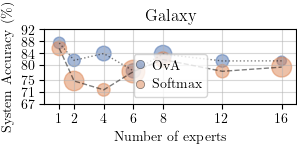

In [5]:
# set_aistats2023_style()
dataset = "Galaxy"
fig, ax = plt.subplots(1,1) # note we must use plt.subplots, not plt.subplot
x_axis = [exp*10 for exp in exp_list]
scale_mark = 3
scale_y = 2
for i, e in enumerate(exp_list):    
    radius_ova = ova_galaxy_std[i]
    print("{} | OvA {} expert: Mean {} \ Std {}".format(dataset, e, ova_galaxy_mean[i], ova_galaxy_std[i]))
    plt.gca().add_patch(plt.Circle((x_axis[i], ova_galaxy_mean[i] * scale_y), radius_ova + scale_mark, fill=True, alpha=0.5, color=cmap[0]))
    radius_softmax = softmax_galaxy_std[i]
    print("{} | Softmax {} expert: Mean {} \ Std {}".format(dataset, e, softmax_galaxy_mean[i], softmax_galaxy_std[i]))
    plt.gca().add_patch(plt.Circle((x_axis[i], softmax_galaxy_mean[i] * scale_y), radius_softmax + scale_mark, fill=True, alpha=0.5, color=cmap[1]))

plt.plot(x_axis, ova_galaxy_mean * scale_y, color="black", linestyle="dotted", alpha=0.5, linewidth=1)
plt.plot(x_axis, softmax_galaxy_mean * scale_y, color="black", linestyle="dashed", alpha=0.5,  linewidth=1)

# x axis
ax.set_xlim(min(x_axis)-10, max(x_axis)+10)
ax.set_xticks(x_axis, exp_list)

# y axis
min_y = min(min(ova_galaxy_mean), min(softmax_galaxy_mean))
max_y = max(max(ova_galaxy_mean), max(softmax_galaxy_mean))
yticks = np.round(np.linspace(min_y-5, max_y+5, len(exp_list)))
yticks_labels = [int(y_i) for y_i in yticks]
ax.set_ylim(min_y * scale_y, max_y * scale_y)
ax.set_yticks(yticks*scale_y, yticks_labels)

# Legend
ova_leg = mlines.Line2D([], [], label="OvA", alpha=0.5, marker="o", color=cmap[0], linestyle="", linewidth=0)
softmax_leg = mlines.Line2D([], [], label="Softmax", alpha=0.5, marker="o", color=cmap[1], linestyle="")
plt.legend(handles=[ova_leg, softmax_leg], loc="best")

ax.set_ylabel(r"System Accuracy $(\%)$")
ax.set_xlabel(r"Number of experts")
plt.title("{}".format(dataset))
ax.grid()

# IMPORTANT! This allows to get the circles. Otherwise, ellipses!
plt.gca().set_aspect(1)

plt.savefig("galaxyzoo.pdf")
# fig = plt.gcf()
# size = fig.get_size_inches()*fig.dpi # size in pixels
# print(size)

# 1 Figure Plot

Galaxy-Zoo | OvA 1 expert: Mean 87.46 \ Std 0.91
Galaxy-Zoo | Softmax 1 expert: Mean 85.62 \ Std 1.86
Galaxy-Zoo | OvA 2 expert: Mean 81.6 \ Std 1.18
Galaxy-Zoo | Softmax 2 expert: Mean 74.63 \ Std 3.57
Galaxy-Zoo | OvA 4 expert: Mean 83.89 \ Std 1.95
Galaxy-Zoo | Softmax 4 expert: Mean 71.65 \ Std 1.26
Galaxy-Zoo | OvA 6 expert: Mean 78.06 \ Std 1.85
Galaxy-Zoo | Softmax 6 expert: Mean 77.82 \ Std 4.64
Galaxy-Zoo | OvA 8 expert: Mean 83.7 \ Std 2.89
Galaxy-Zoo | Softmax 8 expert: Mean 81.86 \ Std 2.16
Galaxy-Zoo | OvA 12 expert: Mean 81.39 \ Std 1.24
Galaxy-Zoo | Softmax 12 expert: Mean 77.9 \ Std 1.43
Galaxy-Zoo | OvA 16 expert: Mean 81.43 \ Std 0.24
Galaxy-Zoo | Softmax 16 expert: Mean 79.31 \ Std 3.67
HAM10000 | OvA 1 expert: Mean 84.375 \ Std 1.68769289
HAM10000 | Softmax 1 expert: Mean 85.9375 \ Std 6.28246775
HAM10000 | OvA 2 expert: Mean 85.9375 \ Std 5.45011707
HAM10000 | Softmax 2 expert: Mean 82.03125 \ Std 8.14400821
HAM10000 | OvA 4 expert: Mean 89.58333333 \ Std 6.0290817

/Users/dbarrejon/miniconda3/envs/l2d-conformal/lib/python3.7/site-packages/ipykernel_launcher.py:145: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


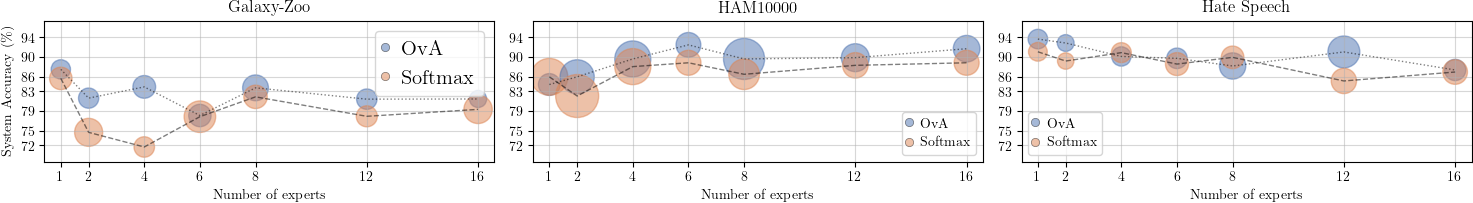

In [11]:
dataset = "Galaxy"

fig, axs = plt.subplots(1,3, figsize=(15,10), sharex=True, sharey=False) # note we must use plt.subplots, not plt.subplot


min_y_global = min(np.concatenate([ova_galaxy_mean, ova_ham_mean, ova_speech_mean, softmax_galaxy_mean, softmax_ham_mean, softmax_speech_mean]))
max_y_global = max(np.concatenate([ova_galaxy_mean, ova_ham_mean, ova_speech_mean, softmax_galaxy_mean, softmax_ham_mean, softmax_speech_mean]))

scale_mark = 5
scale_y = 3
scale_x = 17
x_axis = [exp*scale_x for exp in exp_list]

# Galaxy =======================
# ==============================
dataset = "Galaxy-Zoo"
ax = axs[0]
for i, e in enumerate(exp_list):    
    radius_ova = ova_galaxy_std[i]
    print("{} | OvA {} expert: Mean {} \ Std {}".format(dataset, e, ova_galaxy_mean[i], ova_galaxy_std[i]))
    ax.add_patch(plt.Circle((x_axis[i], ova_galaxy_mean[i] * scale_y), radius_ova + scale_mark, fill=True, alpha=0.5, color=cmap[0]))
    radius_softmax = softmax_galaxy_std[i]
    print("{} | Softmax {} expert: Mean {} \ Std {}".format(dataset, e, softmax_galaxy_mean[i], softmax_galaxy_std[i]))
    ax.add_patch(plt.Circle((x_axis[i], softmax_galaxy_mean[i] * scale_y), radius_softmax + scale_mark, fill=True, alpha=0.5, color=cmap[1]))

ax.plot(x_axis, ova_galaxy_mean * scale_y, color="black", linestyle="dotted", alpha=0.5, linewidth=1)
ax.plot(x_axis, softmax_galaxy_mean * scale_y, color="black", linestyle="dashed", alpha=0.5,  linewidth=1)

# x axis
ax.set_xlim(min(x_axis)-10, max(x_axis)+10)
ax.set_xticks(x_axis, exp_list)

# y-axis
min_y = min_y_global
max_y = max_y_global
yticks = np.round(np.linspace(min_y, max_y, len(exp_list)))  # [::2]
yticks_labels = [int(y_i) for y_i in yticks]
ax.set_ylim(min(yticks*scale_y)-10, max(yticks*scale_y)+10)
ax.set_yticks(yticks*scale_y, yticks_labels)

# Legend
ova_leg = mlines.Line2D([], [], label="OvA", alpha=0.5, marker="o", color=cmap[0], linestyle="", linewidth=0)
softmax_leg = mlines.Line2D([], [], label="Softmax", alpha=0.5, marker="o", color=cmap[1], linestyle="")
ax.legend(handles=[ova_leg, softmax_leg], loc="best", prop={'size': 15})

ax.set_ylabel(r"System Accuracy $(\%)$")
ax.set_xlabel(r"Number of experts")
ax.set_title("{}".format(dataset))
ax.grid()

# IMPORTANT! This allows to get the circles. Otherwise, ellipses!
ax.set_aspect(1, adjustable='box')



# HAM10000 =======================
# ================================
dataset = "HAM10000"
ax = axs[1]
for i, e in enumerate(exp_list):    
    radius_ova = ova_ham_std[i]
    print("{} | OvA {} expert: Mean {} \ Std {}".format(dataset, e, ova_ham_mean[i], ova_ham_std[i]))
    ax.add_patch(plt.Circle((x_axis[i], ova_ham_mean[i] * scale_y), radius_ova + scale_mark, fill=True, alpha=0.5, color=cmap[0]))
    radius_softmax = softmax_ham_std[i]
    print("{} | Softmax {} expert: Mean {} \ Std {}".format(dataset, e, softmax_ham_mean[i], softmax_ham_std[i]))
    ax.add_patch(plt.Circle((x_axis[i], softmax_ham_mean[i] * scale_y), radius_softmax + scale_mark, fill=True, alpha=0.5, color=cmap[1]))

ax.plot(x_axis, ova_ham_mean * scale_y, color="black", linestyle="dotted", alpha=0.5, linewidth=1)
ax.plot(x_axis, softmax_ham_mean * scale_y, color="black", linestyle="dashed", alpha=0.5,  linewidth=1)

# x axis
ax.set_xlim(min(x_axis)-10, max(x_axis)+10)
ax.set_xticks(x_axis, exp_list)

# y-axis
min_y = min_y_global
max_y = max_y_global
yticks = np.round(np.linspace(min_y, max_y, len(exp_list)))  # [::2]
yticks_labels = [int(y_i) for y_i in yticks]
ax.set_ylim(min(yticks*scale_y)-10, max(yticks*scale_y)+10)
ax.set_yticks(yticks*scale_y, yticks_labels)

# Legend
ova_leg = mlines.Line2D([], [], label="OvA", alpha=0.5, marker="o", color=cmap[0], linestyle="", linewidth=0)
softmax_leg = mlines.Line2D([], [], label="Softmax", alpha=0.5, marker="o", color=cmap[1], linestyle="")
ax.legend(handles=[ova_leg, softmax_leg], loc="best")

# ax.set_ylabel(r"System Accuracy $(\%)$")
ax.set_xlabel(r"Number of experts")
ax.set_title("{}".format(dataset))
ax.grid()

# IMPORTANT! This allows to get the circles. Otherwise, ellipses!
ax.set_aspect(1, adjustable='box')


# HateSpeech =======================
# ==================================
dataset = "Hate Speech"
ax = axs[2]
for i, e in enumerate(exp_list):    
    radius_ova = ova_speech_std[i]
    print("{} | OvA {} expert: Mean {} \ Std {}".format(dataset, e, ova_speech_mean[i], ova_speech_std[i]))
    ax.add_patch(plt.Circle((x_axis[i], ova_speech_mean[i] * scale_y), radius_ova + scale_mark, fill=True, alpha=0.5, color=cmap[0]))
    radius_softmax = softmax_speech_std[i]
    print("{} | Softmax {} expert: Mean {} \ Std {}".format(dataset, e, softmax_speech_mean[i], softmax_speech_std[i]))
    ax.add_patch(plt.Circle((x_axis[i], softmax_speech_mean[i] * scale_y), radius_softmax + scale_mark, fill=True, alpha=0.5, color=cmap[1]))

ax.plot(x_axis, ova_speech_mean * scale_y, color="black", linestyle="dotted", alpha=0.5, linewidth=1)
ax.plot(x_axis, softmax_speech_mean * scale_y, color="black", linestyle="dashed", alpha=0.5,  linewidth=1)

# x axis
ax.set_xlim(min(x_axis)-10, max(x_axis)+10)
ax.set_xticks(x_axis, exp_list)

# y-axis
min_y = min_y_global
max_y = max_y_global
yticks = np.round(np.linspace(min_y, max_y, len(exp_list)))  # [::2]
yticks_labels = [int(y_i) for y_i in yticks]
ax.set_ylim(min(yticks*scale_y)-10, max(yticks*scale_y)+10)
ax.set_yticks(yticks*scale_y, yticks_labels)

# Legend
ova_leg = mlines.Line2D([], [], label="OvA", alpha=0.5, marker="o", color=cmap[0], linestyle="", linewidth=0)
softmax_leg = mlines.Line2D([], [], label="Softmax", alpha=0.5, marker="o", color=cmap[1], linestyle="")
ax.legend(handles=[ova_leg, softmax_leg], loc="best")

# ax.set_ylabel(r"System Accuracy $(\%)$")
ax.set_xlabel(r"Number of experts")
ax.set_title("{}".format(dataset))
ax.grid()
# IMPORTANT! This allows to get the circles. Otherwise, ellipses!
ax.set_aspect("equal", adjustable='box')

# ratio = 0.4

# for ax in axs:
#     xmin, xmax = ax.get_xlim()
#     ymin, ymax = ax.get_ylim()
#     print((xmax-xmin)/(ymax-ymin))
#     ax.set_aspect(abs((xmax-xmin)/(ymax-ymin))*ratio, adjustable='box')


plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.savefig("datasets_system_accuracy.pdf")



# Subfigures

In [ ]:
dataset = "Galaxy"

fig, axs = plt.subplots(1,3, figsize=(15,10), sharex=True, sharey=False) # note we must use plt.subplots, not plt.subplot

scale_mark = 5
scale_y = 3
scale_x = 17
x_axis = [exp*scale_x for exp in exp_list]

# Galaxy =======================
# ==============================
dataset = "Galaxy-Zoo"
ax = axs[0]
for i, e in enumerate(exp_list):    
    radius_ova = ova_galaxy_std[i]
    print("{} | OvA {} expert: Mean {} \ Std {}".format(dataset, e, ova_galaxy_mean[i], ova_galaxy_std[i]))
    ax.add_patch(plt.Circle((x_axis[i], ova_galaxy_mean[i] * scale_y), radius_ova + scale_mark, fill=True, alpha=0.5, color=cmap[0]))
    radius_softmax = softmax_galaxy_std[i]
    print("{} | Softmax {} expert: Mean {} \ Std {}".format(dataset, e, softmax_galaxy_mean[i], softmax_galaxy_std[i]))
    ax.add_patch(plt.Circle((x_axis[i], softmax_galaxy_mean[i] * scale_y), radius_softmax + scale_mark, fill=True, alpha=0.5, color=cmap[1]))

ax.plot(x_axis, ova_galaxy_mean * scale_y, color="black", linestyle="dotted", alpha=0.5, linewidth=1)
ax.plot(x_axis, softmax_galaxy_mean * scale_y, color="black", linestyle="dashed", alpha=0.5,  linewidth=1)

# x axis
ax.set_xlim(min(x_axis)-10, max(x_axis)+10)
ax.set_xticks(x_axis, exp_list)

# y-axis
min_y = min_y_global
max_y = max_y_global
yticks = np.round(np.linspace(min_y, max_y, len(exp_list)))  # [::2]
yticks_labels = [int(y_i) for y_i in yticks]
ax.set_ylim(min(yticks*scale_y)-20, max(yticks*scale_y)+20)
ax.set_yticks(yticks*scale_y, yticks_labels)

# Legend
ova_leg = mlines.Line2D([], [], label="OvA", alpha=0.5, marker="o", color=cmap[0], linestyle="", linewidth=0)
softmax_leg = mlines.Line2D([], [], label="Softmax", alpha=0.5, marker="o", color=cmap[1], linestyle="")
ax.legend(handles=[ova_leg, softmax_leg], loc="best")

ax.set_ylabel(r"System Accuracy $(\%)$")
ax.set_xlabel(r"Number of experts")
ax.set_title("{}".format(dataset))
ax.grid()

# IMPORTANT! This allows to get the circles. Otherwise, ellipses!
ax.set_aspect(1, adjustable='box')



# HAM10000 =======================
# ================================
dataset = "HAM10000"
ax = axs[1]
for i, e in enumerate(exp_list):    
    radius_ova = ova_ham_std[i]
    print("{} | OvA {} expert: Mean {} \ Std {}".format(dataset, e, ova_ham_mean[i], ova_ham_std[i]))
    ax.add_patch(plt.Circle((x_axis[i], ova_ham_mean[i] * scale_y), radius_ova + scale_mark, fill=True, alpha=0.5, color=cmap[0]))
    radius_softmax = softmax_ham_std[i]
    print("{} | Softmax {} expert: Mean {} \ Std {}".format(dataset, e, softmax_ham_mean[i], softmax_ham_std[i]))
    ax.add_patch(plt.Circle((x_axis[i], softmax_ham_mean[i] * scale_y), radius_softmax + scale_mark, fill=True, alpha=0.5, color=cmap[1]))

ax.plot(x_axis, ova_ham_mean * scale_y, color="black", linestyle="dotted", alpha=0.5, linewidth=1)
ax.plot(x_axis, softmax_ham_mean * scale_y, color="black", linestyle="dashed", alpha=0.5,  linewidth=1)

# x axis
ax.set_xlim(min(x_axis)-10, max(x_axis)+10)
ax.set_xticks(x_axis, exp_list)

# y-axis
min_y = min_y_global
max_y = max_y_global
yticks = np.round(np.linspace(min_y, max_y, len(exp_list)))  # [::2]
yticks_labels = [int(y_i) for y_i in yticks]
ax.set_ylim(min(yticks*scale_y)-20, max(yticks*scale_y)+20)
ax.set_yticks(yticks*scale_y, yticks_labels)

# Legend
ova_leg = mlines.Line2D([], [], label="OvA", alpha=0.5, marker="o", color=cmap[0], linestyle="", linewidth=0)
softmax_leg = mlines.Line2D([], [], label="Softmax", alpha=0.5, marker="o", color=cmap[1], linestyle="")
ax.legend(handles=[ova_leg, softmax_leg], loc="best")

# ax.set_ylabel(r"System Accuracy $(\%)$")
ax.set_xlabel(r"Number of experts")
ax.set_title("{}".format(dataset))
ax.grid()

# IMPORTANT! This allows to get the circles. Otherwise, ellipses!
ax.set_aspect(1, adjustable='box')


# HateSpeech =======================
# ==================================
dataset = "Hate Speech"
ax = axs[2]
for i, e in enumerate(exp_list):    
    radius_ova = ova_speech_std[i]
    print("{} | OvA {} expert: Mean {} \ Std {}".format(dataset, e, ova_speech_mean[i], ova_speech_std[i]))
    ax.add_patch(plt.Circle((x_axis[i], ova_speech_mean[i] * scale_y), radius_ova + scale_mark, fill=True, alpha=0.5, color=cmap[0]))
    radius_softmax = softmax_speech_std[i]
    print("{} | Softmax {} expert: Mean {} \ Std {}".format(dataset, e, softmax_speech_mean[i], softmax_speech_std[i]))
    ax.add_patch(plt.Circle((x_axis[i], softmax_speech_mean[i] * scale_y), radius_softmax + scale_mark, fill=True, alpha=0.5, color=cmap[1]))

ax.plot(x_axis, ova_speech_mean * scale_y, color="black", linestyle="dotted", alpha=0.5, linewidth=1)
ax.plot(x_axis, softmax_speech_mean * scale_y, color="black", linestyle="dashed", alpha=0.5,  linewidth=1)

# x axis
ax.set_xlim(min(x_axis)-10, max(x_axis)+10)
ax.set_xticks(x_axis, exp_list)

# y-axis
min_y = min_y_global
max_y = max_y_global
yticks = np.round(np.linspace(min_y, max_y, len(exp_list)))  # [::2]
yticks_labels = [int(y_i) for y_i in yticks]
ax.set_ylim(min(yticks*scale_y)-20, max(yticks*scale_y)+20)
ax.set_yticks(yticks*scale_y, yticks_labels)

# Legend
ova_leg = mlines.Line2D([], [], label="OvA", alpha=0.5, marker="o", color=cmap[0], linestyle="", linewidth=0)
softmax_leg = mlines.Line2D([], [], label="Softmax", alpha=0.5, marker="o", color=cmap[1], linestyle="")
ax.legend(handles=[ova_leg, softmax_leg], loc="best")

# ax.set_ylabel(r"System Accuracy $(\%)$")
ax.set_xlabel(r"Number of experts")
ax.set_title("{}".format(dataset))
ax.grid()
# IMPORTANT! This allows to get the circles. Otherwise, ellipses!
ax.set_aspect("equal", adjustable='box')
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.savefig("datasets_system_accuracy.pdf")
